In [0]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset and a 2D representation
built using PCA, then do a simple classification



In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

Plot the data: images of digits
-------------------------------

Each data in a 8x8 image



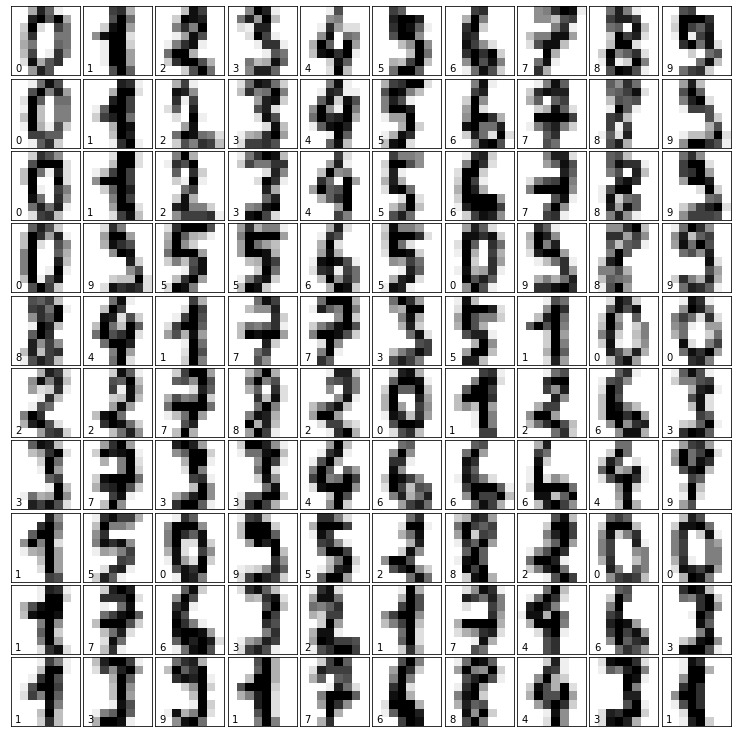

In [84]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Plot a projection on the 2 first principal axis
------------------------------------------------



(1797, 10)


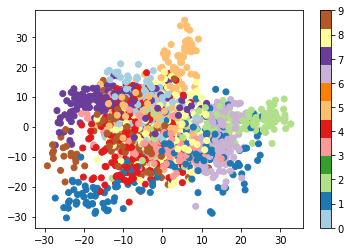

In [94]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
print(proj.shape)
plt.scatter(proj[:, 1], proj[:, 2], c=digits.target, cmap="Paired")
plt.colorbar()

Classify with Gaussian naive Bayes
----------------------------------



GaussianNB(priors=None, var_smoothing=1e-09)
Score =  0.8507795100222717


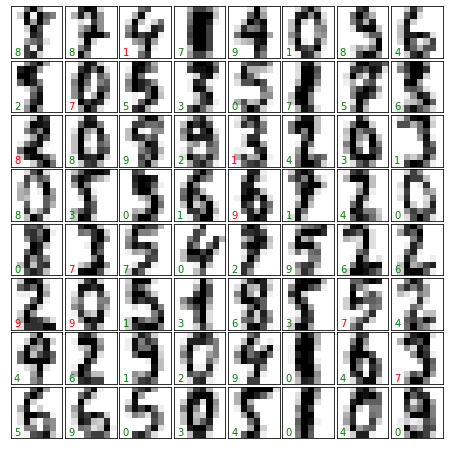

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
XP_train, XP_test, yP_train, yP_test = train_test_split(digits.data, digits.target)
pca = PCA(n_components=64)


X_train, X_test, y_train, y_test = train_test_split(pca.fit_transform(digits.data)[:,0:5], digits.target)


# train the model
clf = GaussianNB()
#clf = AdaBoostClassifier()
#clf = svm.SVC(gamma=0.001)

print(clf.fit(X_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test


print("Score = ",clf.score(X_train, y_train))

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(XP_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

# **Plot principal components**

[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.14286697e-30 1.14286697e-30 1.12542605e-30]


<BarContainer object of 64 artists>

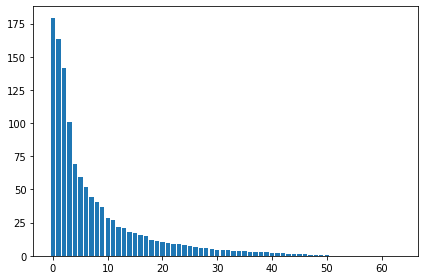

In [134]:
import matplotlib.pyplot as plt


principal = pca.explained_variance_
print(pca.explained_variance_)

fig, ax = plt.subplots(tight_layout=True)
ax.bar( [x for x in range(principal.size)], principal)


Quantify the performance
------------------------

First print the number of correct matches



In [106]:
matches = (predicted == expected)
print(matches.sum())

295


The total number of data points



In [107]:
print(len(matches))

450


And now, the ration of correct predictions



In [108]:
matches.sum() / float(len(matches))

0.6555555555555556

Print the classification report



In [109]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.74      0.41      0.53        56
           2       0.57      0.70      0.63        37
           3       0.91      0.56      0.69        54
           4       0.76      0.88      0.81        42
           5       0.27      0.11      0.15        38
           6       0.87      0.82      0.84        49
           7       0.61      0.79      0.69        53
           8       0.36      0.67      0.46        39
           9       0.66      0.74      0.70        42

    accuracy                           0.66       450
   macro avg       0.66      0.66      0.64       450
weighted avg       0.68      0.66      0.65       450



Print the confusion matrix



In [110]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[36  0  0  0  0  1  3  0  0  0]
 [ 0 23  0  0  5  2  0  8 18  0]
 [ 0  0 26  1  0  1  0  2  7  0]
 [ 0  0 10 30  0  1  0  2  1 10]
 [ 0  1  0  0 37  0  3  0  1  0]
 [ 3  2  3  0  0  4  0  8 12  6]
 [ 2  0  0  0  7  0 40  0  0  0]
 [ 0  4  1  0  0  1  0 42  5  0]
 [ 0  0  4  0  0  3  0  6 26  0]
 [ 0  1  2  2  0  2  0  1  3 31]]
